# 13.1.1 파이썬 클래스 기초

In [1]:
class ExampleOne(object):
    pass

In [2]:
c = ExampleOne()

In [3]:
c.__str__()

'<__main__.ExampleOne object at 0x000001FCBF10F3C8>'

In [4]:
type(c)

__main__.ExampleOne

클래스에 속성을 추가하려면 init이라는 것을 정의해야함

In [5]:
class ExampleTwo(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

In [6]:
c = ExampleTwo(1, 'text')

In [7]:
c.a

1

In [8]:
c.b

'text'

In [9]:
c.a = 100

In [10]:
c.a

100

In [11]:
c = ExampleOne()
c.first_name = 'WHI JAE'
c.last_name = 'JU'
c.movies = 4

In [12]:
print(c.first_name, c.last_name, c.movies)

WHI JAE JU 4


In [13]:
class ExampleThree(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def addition(self):
        return self.a + self.b

In [14]:
c = ExampleThree(10, 15)
c.addition()

25

In [15]:
c.a += 10
c.addition()

35

ExampleTwo와 ExampleThree의 차이는 메서드 정의뿐 -> ExampleThree를 ExampleTwo를 상속하여 정의 가능

In [16]:
class ExampleFour(ExampleTwo):
    def addition(self):
        return self.a + self.b

In [17]:
c = ExampleFour(10, 15)
c.addition()

25

다중 상속도 가능 But, 가독성 떨어진다. 

In [18]:
class ExampleFive(ExampleFour):
    def multiple(self):
        return self.a * self.b

In [19]:
c = ExampleFive(10, 15)
c.addition()

25

In [20]:
c.multiple()

150

메서드 정의를 클래스 정의 안에 무조건 포함X

In [21]:
def multiple(self):
    return self.a * self.b

In [22]:
class ExampleSix(ExampleFour):
    multiple = multiple

In [23]:
c = ExampleSix(10, 10)
c.addition()

20

In [24]:
c.multiple()

100

클래스 또는 객체가 Private 속성을 가져야 할때 해당 속성 앞에 __을 붙인다

In [25]:
class ExampleSeven(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
        self.__sum = a + b
    
    multiple = multiple
    
    def addition(self):
        return self.__sum

In [26]:
c = ExampleSeven(10, 16)
c.addition()

26

a, b의 속성값을 바꿔도 결과가 바뀌지 않는다.

In [27]:
c.a += 10
c.addition()

26

In [28]:
c._ExampleSeven__sum

26

In [29]:
c = ExampleSeven(20, 16)
c.addition()

36

#### iter method

클래스 인스턴스를 반복해야하는 경우에 호출

In [30]:
name_list = ['Sandra', 'Lilli', 'Guido', 'Zorro', 'Henry']

In [31]:
for name in name_list:
    print(name)

Sandra
Lilli
Guido
Zorro
Henry


In [41]:
class sorted_list(object):
    def __init__(self, elements):
        self.elements = sorted(elements)
    
    def __iter__(self):
        self.position = -1
        return self
    
    def __next__(self):
        if self.position == len(self.elements) - 1:
            raise StopIteration
        self.position += 1
        return self.elements[self.position]

In [42]:
sorted_name_list = sorted_list(name_list)

In [45]:
for name in sorted_name_list:
    print(name)

Guido
Henry
Lilli
Sandra
Zorro


In [46]:
for name in sorted(name_list):
    print(name)

Guido
Henry
Lilli
Sandra
Zorro


In [47]:
type(sorted_name_list)

__main__.sorted_list

# 13.1.2 단기 이자유 클래스

In [48]:
import numpy as np
def discount_factor(r, t):
    ''' 할인율 계산 함수
    
    인수
    ===
    r : float
        고정 단기 이자율. 양수
    
    t : float, array of floats
        미래의 일자. 연단위
    
    반환값
    =====
    df : float
        할인율
    '''
    df = np.exp(-r * t)
    
    return df

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

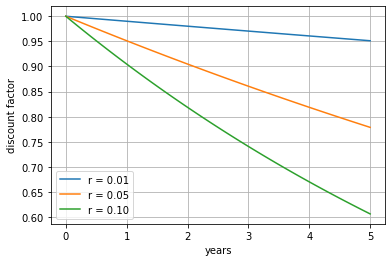

In [50]:
t = np.linspace(0, 5)
for r in [0.01, 0.05, 0.1]:
    plt.plot(t, discount_factor(r, t), label = 'r = %4.2f' % r, lw = 1.5)
plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc = 0)

In [51]:
class short_rate(object):
    ''' 고정 단기 이자율 
    
    인수
    ====
    name : string
        객체 이름
        
    rate : float
        고정 단기 이자율. 양수
    
    method
    =====
    get_discount_factors :
        주어진 시간 리스트/배열 입력에 대해 할인율을 반환
    '''
    def __init__(self, name, rate):
        self.name = name
        self.rate = rate
        
    def get_discount_factors(self, time_list):
        time_list = np.array(time_list)
        return np.exp(-self.rate * time_list)

In [52]:
sr = short_rate('r', 0.05)
sr.name, sr.rate

('r', 0.05)

In [53]:
time_list = [0.0, 0.5, 1.0, 1.25, 1.75, 2.0]
sr.get_discount_factors(time_list)

array([1.        , 0.97530991, 0.95122942, 0.93941306, 0.91621887,
       0.90483742])

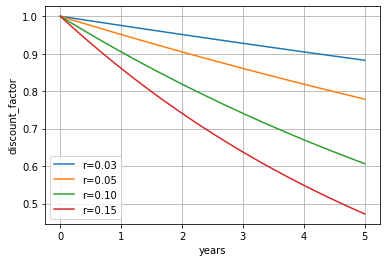

In [56]:
for r in [0.025, 0.05, 0.1, 0.15]:
    sr.rate = r
    plt.plot(t, sr.get_discount_factors(t), label = 'r=%4.2f' % sr.rate, lw = 1.5)
plt.xlabel('years')
plt.ylabel('discount_factor')
plt.grid(True)
plt.legend(loc = 0)

In [59]:
sr.rate = 0.05
cash_flows = np.array([-100, 50, 75])
time_list = [0.0, 1.0, 2.0]

In [60]:
disc_facts = sr.get_discount_factors(time_list)
disc_facts

array([1.        , 0.95122942, 0.90483742])

In [61]:
# 현재 가치
cash_flows * disc_facts

array([-100.        ,   47.56147123,   67.86280635])

In [62]:
# 순 현재 가치
np.sum(cash_flows * disc_facts)

15.424277577732667

이자율이 0.05일때는 순현가가 양수이므로 투자 O

In [63]:
sr.rate = 0.15
np.sum(sr.get_discount_factors(time_list) * cash_flows)

-1.403234627618268

이자율이 0.15일때는 순현가가 음수이므로 투자 X

# 13.1.2 현금 흐름 클래스

In [64]:
class cash_flow_series(object):
    ''' 일련의 현금흐름 모형
    
    속성
    ====
    name : string
        객체 이름
    time_list : list/array-like
        시간 리스트
    cash_flows : list/array-like
        현금 흐름 값 리스트
    short_rate : instance of short_rate class
        할인에 사용되는 단기 이자율
    
    method
    =====
    present_value_list :
        현재 가치 배열 반환
    net_present_value :
        전체 현금 흐름에 대한 순 현재 가치 반환
    '''
    def __init__(self, name, time_list, cash_flows, short_rate):
        self.name = name
        self.time_list = time_list
        self.cash_flows = cash_flows
        self.short_rate = short_rate
    
    def present_value_list(self):
        df = self.short_rate.get_discount_factors(self.time_list)
        return np.array(self.cash_flows) * df
    
    def net_present_value(self):
        return np.sum(self.present_value_list())

In [66]:
sr.rate = 0.05
cfs = cash_flow_series('cfs', time_list, cash_flows, sr)

In [67]:
cfs.cash_flows

array([-100,   50,   75])

In [68]:
cfs.time_list

[0.0, 1.0, 2.0]

In [69]:
cfs.present_value_list()

array([-100.        ,   47.56147123,   67.86280635])

In [70]:
cfs.net_present_value()

15.424277577732667

#### 민감도 분석을 위한 method

여러 이자율 값에 대한 순 현가를 계산

In [71]:
class cfs_sensitivity(cash_flow_series):
    def npv_sensitivity(self, short_rate):
        npvs = []
        for rate in short_rates:
            sr.rate = rate
            npvs.append(self.net_present_value())
        return np.array(npvs)
cfs_sens = cfs_sensitivity('cfs', time_list, cash_flows, sr)

In [72]:
short_rates = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2]

In [73]:
npvs = cfs_sens.npv_sensitivity(short_rates)

In [74]:
npvs

array([23.01739219, 20.10770244, 15.42427758, 10.94027255,  6.64667738,
        2.53490386, -1.40323463, -8.78945889])

Text(0, 0.5, 'net present value')

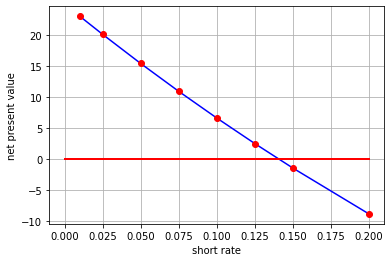

In [78]:
plt.plot(short_rates, npvs, 'b')
plt.plot(short_rates, npvs, 'ro')
plt.plot((0, max(short_rates)), (0, 0), 'r', lw = 2)
plt.grid(True)
plt.xlabel('short rate')
plt.ylabel('net present value')